<a href="https://colab.research.google.com/github/sairamadithya/brain-tumor-detection/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this code is about developing a website for detecting brain tumor from the given MRI image using CNN.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

I am using a dataset that contains about 400 brain tumor and normal MRI images.

I have used imagedatagenerator to generate samples from the image dataset by applying the specified transforms.

In [2]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [3]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_tumor_images/train',
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_tumor_images/val',
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'binary')

Found 300 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


I have developed a transfer learning based EfficientNetB2 CNN model for this task. I have added certain other layers to overcome the problem of overfitting.

In [4]:
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=True
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1408)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1442816   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                           

I have compiled the model using crossentropy loss function, adam optimiser and the following metrics:-

accuracy

AUC

precision

recall

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy','AUC','Precision','Recall'])

In [6]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    steps_per_epoch= 35
    )

Epoch 1/30
35/35 [==============================] - 88s 2s/step - loss: 0.9453 - accuracy: 0.5072 - auc: 0.5161 - precision: 0.5541 - recall: 0.5395 - val_loss: 0.6757 - val_accuracy: 0.6000 - val_auc: 0.5310 - val_precision: 0.6528 - val_recall: 0.7581
Epoch 2/30
35/35 [==============================] - 12s 349ms/step - loss: 0.6848 - accuracy: 0.6630 - auc: 0.6998 - precision: 0.7143 - recall: 0.6536 - val_loss: 0.6251 - val_accuracy: 0.6700 - val_auc: 0.7088 - val_precision: 0.7231 - val_recall: 0.7581
Epoch 3/30
35/35 [==============================] - 12s 339ms/step - loss: 0.5999 - accuracy: 0.7210 - auc: 0.7818 - precision: 0.8045 - recall: 0.6772 - val_loss: 0.5958 - val_accuracy: 0.7000 - val_auc: 0.7649 - val_precision: 0.7500 - val_recall: 0.7742
Epoch 4/30
35/35 [==============================] - 12s 329ms/step - loss: 0.5418 - accuracy: 0.7500 - auc: 0.8199 - precision: 0.8248 - recall: 0.7152 - val_loss: 0.5470 - val_accuracy: 0.8000 - val_auc: 0.8652 - val_precision: 0.8

the model has produced the following results:

training accuracy= 99.0%

training loss= 0.0518

training precision= 100%

training recall= 98.21%

training AUC= 0.9995

In [7]:
model.evaluate(train_generator)

38/38 [==============================] - 6s 155ms/step - loss: 0.0518 - accuracy: 0.9900 - auc: 0.9995 - precision: 1.0000 - recall: 0.9821


[0.05183592811226845,
 0.9900000095367432,
 0.9995490312576294,
 1.0,
 0.9821428656578064]

the model has produced the following results:

validation accuracy= 92.00%

validation loss= 0.1492

validation precision= 98.21%

validation recall= 88.71%

validation AUC= 0.9936

In [8]:
model.evaluate(validation_generator)

13/13 [==============================] - 2s 146ms/step - loss: 0.1492 - accuracy: 0.9200 - auc: 0.9936 - precision: 0.9821 - recall: 0.8871


[0.14919380843639374,
 0.9200000166893005,
 0.9936332702636719,
 0.9821428656578064,
 0.8870967626571655]

[[0.00193358]]
THE UPLOADED IMAGE IS SUSPECTED AS: normal (devoid of tumor)


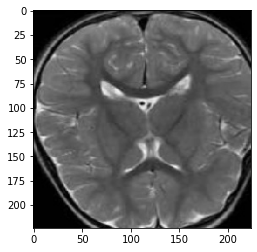

In [9]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Brain_tumor_images/val/normal/Normal (135).jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
  op='normal (devoid of tumor)'
else:
  op= 'brain tumor'    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  


In [10]:
tf.keras.models.save_model(model,'brain_tumor.hdf5')

In [ ]:
!pip install streamlit

I have developed the frontend for the website that accepts the MRI image from the user in the form of JPG, PNG or JPEG and then detects brain tumor in the given MRI image.

In [18]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
import pandas as pd
import cv2
import numpy as np


html_temp = """ 
  <div style="background-color:pink ;padding:10px">
  <h2 style="color:white;text-align:center;"> BRAIN TUMOR DETECTION USING MRI IMAGES ⚕️⚕️⚕️</h2>
  </div>
  """ 
st.markdown(html_temp, unsafe_allow_html=True) 
st.header('Done by Sairam Adithya')
st.write('This website is about the detection of brain tumor using MRI images. Presence of tumor in the brain is difficult to diagnose and its presence is noted through symptoms like reccurent headache and so on. MRI is one of the meedical imaging technologies that can be adapted to visualise the tumor effectively.')
st.write('Cancer is a medical condition which is due to abnormal, uncontrollable, uncoordinated division of cells.')
imag = Image.open('tumor.jpeg')
st.image(imag, use_column_width=False)
st.write('A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign)')
st.write('Magnetic resonance imaging (MRI) is a medical imaging technique that uses a magnetic field and computer-generated radio waves to create detailed images of the organs and tissues in your body. Most MRI machines are large, tube-shaped magnets.')
image = Image.open('mri.jpeg')
st.image(image, use_column_width=False)
st.write('Please upload the MRI image file in the given browse file button.')
@st.cache(allow_output_mutation=True)
def load_model():
   model=tf.keras.models.load_model('/content/brain_tumor.hdf5')
   return model
with st.spinner('Model is being loaded..'):
    model=load_model()
file = st.file_uploader("Please upload any image from the local machine in case of computer or upload camera image in case of mobile.", type=["jpg", "png","jpeg"])
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):   
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        return prediction
if file is None:
     st.text("Please upload an image file within the allotted file size")
else:
     img = Image.open(file)
     st.image(img, use_column_width=False)
     size = (224,224)    
     image = ImageOps.fit(img, size, Image.ANTIALIAS)
     imag = np.asarray(image)
     imaga = np.expand_dims(imag,axis=0) 
     predictions = model.predict(imaga)
     #predictions = import_and_predict(image, model)
     a=predictions[0]
     if a<0.5:
       st.success('The subject under observation is devoid of brain tumor. Please ensure that you consult with a professional before pursuing any kinds of treatment.')
       #st.warning('the model is only 75% accurate. this is the beta version of the model. Futher enhancements has to made to get the best results.')
     else:
       st.error('The subject under observation is suspected to have brain tumor. Please ensure that you consult with a professional or confirm with the other modalities present in the tool.')
       #st.warning('the model is only 75% accurate. this is the beta version of the model. Futher enhancements has to made to get the best results.')        

Overwriting app.py


In [19]:
!streamlit run app.py & npx localtunnel --port 8501

2022-03-13 05:07:08.382 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.69.32.56:8501

npx: installed 22 in 3.51s
your url is: https://giant-lion-28.loca.lt
2022-03-13 05:08:58.467117: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
  Stopping...
^C
